## Import all necessary packages

In [1]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import matplotlib.pyplot as plt
import importlib
import yaml
import glob
import sys
sys.path.append(os.path.abspath('').split('notebooks')[0])
from WBTSdata import plotters, tools, merge_datasets


Note: This assumes you have already installed the package using
``` 
pip install -e .
```

An alternative could be:
```
import pathlib
import sys
script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))
sys.path.append(str(parent_dir) + 'load_data')
```

which assumes that you're running the notebook from within `WBTSdata/notebooks/`.

## Load the merged file

Loads the file created by running the script `load_data.ipynb`

In [2]:
### import basepath from mission_config.yaml
config = tools.get_config()
input_dir = config['input_dir']
output_dir = config['output_dir']
print('Input directory: ',input_dir ,'\nOutput directory: ',output_dir)


Input directory:  /Users/tillmoritz/Desktop/Work/WBTSData 
Output directory:  /Users/tillmoritz/Desktop/Work/Created_files


In [3]:
ds_all = merge_datasets.merge_years(output_dir)

In [4]:
ds_all

<xarray.Dataset> Size: 1GB
Dimensions:           (DATETIME: 2902, DEPTH: 5828)
Coordinates:
  * DEPTH             (DEPTH) float64 47kB 1.0 2.0 3.0 ... 5.827e+03 5.828e+03
  * DATETIME          (DATETIME) datetime64[ns] 23kB 2001-04-26T17:06:58 ... ...
    LATITUDE          (DATETIME) float64 23kB 26.45 26.45 27.02 ... 26.5 26.5
    LONGITUDE         (DATETIME) float64 23kB -79.92 -79.92 ... -76.81 -76.81
Data variables:
    TEMP              (DATETIME, DEPTH) float64 135MB 26.02 26.02 ... nan nan
    THETA             (DATETIME, DEPTH) float64 135MB 26.02 26.02 ... nan nan
    PSAL              (DATETIME, DEPTH) float64 135MB 36.23 36.23 ... nan nan
    DYN_HEIGHT        (DATETIME, DEPTH) float64 135MB 0.004 0.008 ... nan nan
    GA                (DATETIME, DEPTH) float64 135MB 0.993 1.987 ... nan nan
    DOXY              (DATETIME, DEPTH) float64 135MB 214.4 214.5 ... nan nan
    TIME_FLAG         (DATETIME) float64 23kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    CAST_NUMBER       (DATETIME) float64 23kB 0.0 0.0 1.0 1.0 ... 43.0 44.0 44.0
    GC_STRING         (DATETIME) <U10 116kB 'GC_2001_04' ... 'GC_2023_02'
    U_WATER_VELOCITY  (DATETIME, DEPTH) float64 135MB nan nan nan ... nan nan
    V_WATER_VELOCITY  (DATETIME, DEPTH) float64 135MB nan nan nan ... nan nan
    ERROR_VELOCITY    (DATETIME, DEPTH) float64 135MB nan nan nan ... nan nan
Attributes: (12/26)
    title:                      CTD and LADCP data of the Abaco Cruise
    project:                    Western Boundary Time Series
    project_id:                 AB1202 / RB1201
    platform:                   CTD and Lowered Acoustic Doppler Current Prof...
    geospatial_lat_min:         18.501
    geospatial_lat_max:         35.453
    ...                         ...
    data_url:                   
    web_link:                   https://www.aoml.noaa.gov/phod/wbts/data.php
    comment:                    GIT repository: https://github.com/ifmeo-hamb...
    date_created:               2024-12-09
    featureType:                profile
    Conventions:                CF-1.11

In [5]:
ds_all.to_netcdf(output_dir+'/Merged/'+'WBTS_all_years_CTD_LADCP.nc')

## Plot the stations of the whole time series for different longitudes

/Users/tillmoritz/Desktop/Work/Git/WBTSdatafork/WBTSdata/plotters.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


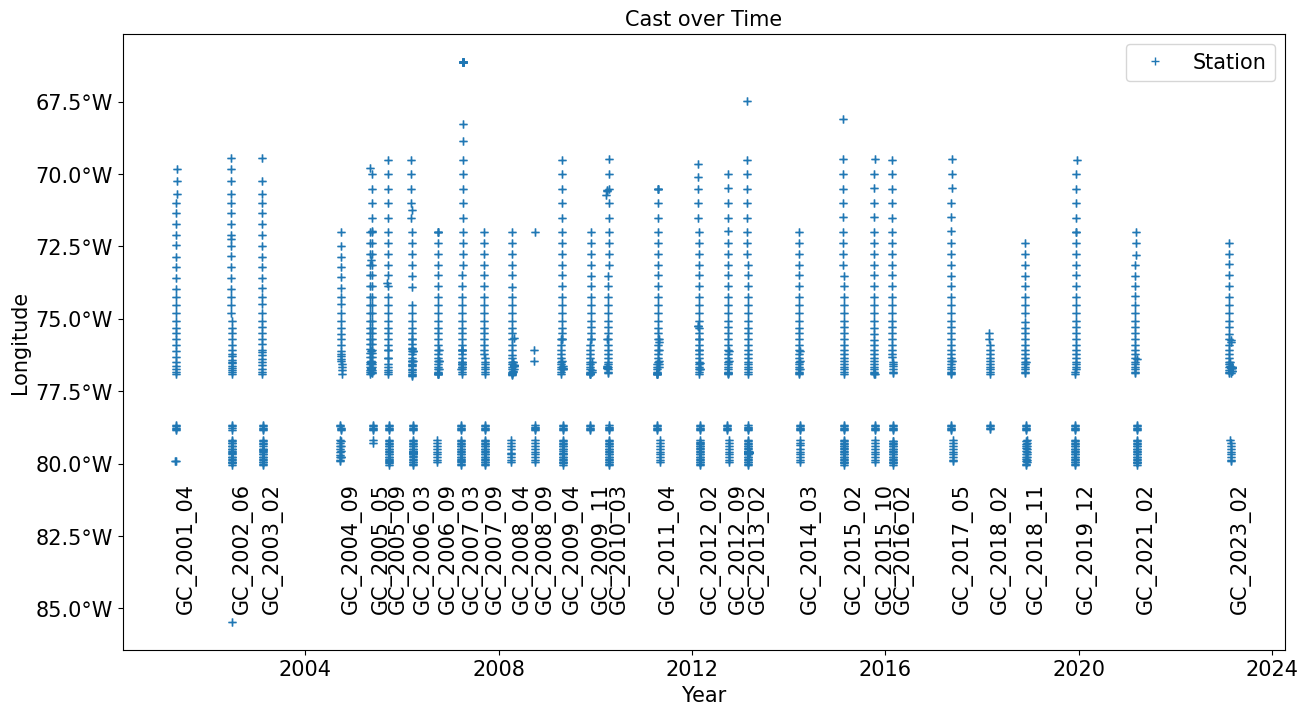

In [5]:
# Example usage
fig, ax = plotters.plot_cast_over_time(ds_all)
plt.show()